# Распознавание CIFAR10

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

In [ ]:
transform_ = transforms.Compose([transforms.ToTensor()])
train_dataset = CIFAR10(root = '/cifar10', download=True,transform=transform_, train=True)

Extracting /cifar10/cifar-10-python.tar.gz to /cifar10


In [ ]:
def im_show(image):
    image = image.permute(1,2,0)
    image = image.numpy()
    print(image.shape)
    plt.imshow(image)

In [ ]:
train_loader = DataLoader(dataset=train_dataset,shuffle=True, batch_size=1)

In [ ]:
image, labes = next(iter(train_loader))
im_show(image)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = Net().cuda()

In [ ]:
image, labes = next(iter(train_loader))
image = image.cuda()


In [ ]:
model(image)

tensor([[ 0.0612, -0.0577, -0.1032,  0.0668, -0.0559, -0.0510,  0.0306,  0.0321,
         -0.0973, -0.0915]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
train_loader = DataLoader(dataset=train_dataset,shuffle=True, batch_size=64)

In [ ]:
optimizer = optim.SGD(params=model.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [ ]:
#losses = []
num_epochs=70
model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for images, labels in train_loader:
        images = images.cuda()
        labels = labels.cuda()

        model.zero_grad()
        pred = model(images)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        epoch_losses.append(loss.item())
    print("Epoch [{}/{}], Loss: {}".format(epoch+1, num_epochs, sum(epoch_losses)/len(epoch_losses)))

Epoch [1/20], Loss: 0.539073872063166
Epoch [2/20], Loss: 0.5340459174702844
Epoch [3/20], Loss: 0.5258630334263872
Epoch [4/20], Loss: 0.5181396986593676
Epoch [5/20], Loss: 0.5109097943510241
Epoch [6/20], Loss: 0.5065112137199973
Epoch [7/20], Loss: 0.4940669209222355
Epoch [8/20], Loss: 0.48560126741295273
Epoch [9/20], Loss: 0.48802416506783125
Epoch [10/20], Loss: 0.47304059465980286
Epoch [11/20], Loss: 0.46640489652486106
Epoch [12/20], Loss: 0.4639002000317549
Epoch [13/20], Loss: 0.4524071740029413
Epoch [14/20], Loss: 0.4421713142977346
Epoch [15/20], Loss: 0.4449655186680272
Epoch [16/20], Loss: 0.42787849979327464
Epoch [17/20], Loss: 0.42515754267154143
Epoch [18/20], Loss: 0.419115143473191
Epoch [19/20], Loss: 0.4181508414085259
Epoch [20/20], Loss: 0.40504425899375734


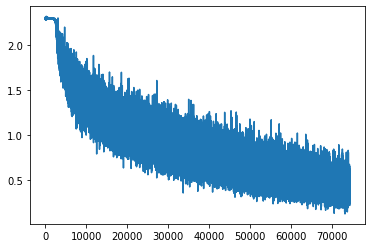

In [ ]:
plt.plot(losses)

In [ ]:
transform_ = transforms.Compose([transforms.ToTensor()])
test_dataset = CIFAR10(root = '/cifar10', download=True,transform=transform_, train=False)

Files already downloaded and verified


In [ ]:
test_dataloader = DataLoader(dataset=test_dataset, batch_size=64)

In [ ]:
model.eval()
result = 0
for images, labels in test_dataloader:
    images = images.cuda()
    labels = labels.cuda()
    pred = model(images)
    prediction = torch.argmax(pred,1)
    res = torch.eq(prediction.cpu(),labels.cpu()).sum()
    result+=res.item()
print('Result: {}%'.format(result/len(test_dataset)*100)) 

Result: 65.06%


(32, 32, 3)
dog


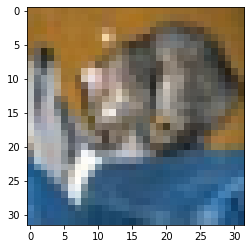

(32, 32, 3)
ship


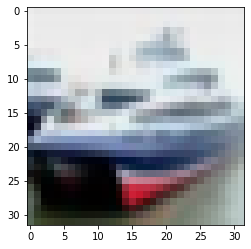

(32, 32, 3)
ship


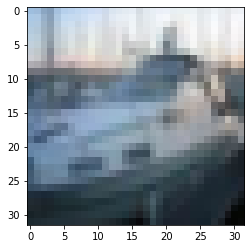

In [ ]:
test_dataloader = DataLoader(dataset=test_dataset, batch_size=3)
samples,labels = next(iter(test_dataloader))
samples_c = samples.cuda()
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
pred = model(samples_c)
prediction = torch.argmax(pred, dim=1)
prediction = prediction.cpu().numpy().tolist()
samples = samples.cpu()
for i in range(len(prediction)):
    im_show(samples[i])
    print(classes[prediction[i]])
    plt.show()

# Домашнее задание

**Задача 1** Заменить в сети из примера сверточные слои с ядром 5x5 на слои с ядром 3x3. Как изменится качество модели?

**Задача 2** На вход слоя подется изображение 100x100 Каким будет размер изображения на выходе сверточного слоя с параметрами:
1. stride=3, padding=2, dilation=1, kernel_size=5
2. stride=5, padding=5, dilation=1, kernel_size=11
3. stride=2, padding=1, dilation=1, kernel_size=3


**Задача 3** На вход слоя подется изображение 100x100. Сколько слоев с ядром 3x3 понадобится поставить поледовательно (без пулинга), чтобы размер изображения на выходе последнего такого слоя был таким же, как размер изображения на выходе слоя с ядром 11x11? stride=1, padding=0